In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Reemplaza 'tu_archivo.csv' con el nombre de tu archivo de datos
df = pd.read_csv('ML_cars.csv')


In [3]:
# Visualización de las primeras filas del DataFrame
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.fueltype.value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Crear un codificador One-Hot
encoder = OneHotEncoder(sparse=False)

# Aplicar el codificador a la columna "Sex"
dffuel = pd.DataFrame(encoder.fit_transform(df[['fueltype']]), columns=encoder.get_feature_names_out(['fueltype']), index=df.index)

# Concatenar las columnas codificadas al DataFrame original y eliminar la columna original "fueltype"
df = pd.concat([df, dffuel], axis=1).drop('fueltype', axis=1)




C:\Users\Casa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
df.drivewheel.value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [7]:

# Crear un codificador One-Hot
encoderdw = OneHotEncoder(sparse=False)

# Aplicar el codificador a la columna "Sex"
dfdrivewheel = pd.DataFrame(encoderdw.fit_transform(df[['drivewheel']]), columns=encoderdw.get_feature_names_out(['drivewheel']), index=df.index)

# Concatenar las columnas codificadas al DataFrame original y eliminar la columna original "drivewheel"
df = pd.concat([df, dfdrivewheel], axis=1).drop('drivewheel', axis=1)
df

C:\Users\Casa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,car_ID,symboling,CarName,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,...,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,std,two,convertible,front,88.6,168.8,64.1,...,111,5000,21,27,13495.0,0.0,1.0,0.0,0.0,1.0
1,2,3,alfa-romero stelvio,std,two,convertible,front,88.6,168.8,64.1,...,111,5000,21,27,16500.0,0.0,1.0,0.0,0.0,1.0
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,front,94.5,171.2,65.5,...,154,5000,19,26,16500.0,0.0,1.0,0.0,0.0,1.0
3,4,2,audi 100 ls,std,four,sedan,front,99.8,176.6,66.2,...,102,5500,24,30,13950.0,0.0,1.0,0.0,1.0,0.0
4,5,2,audi 100ls,std,four,sedan,front,99.4,176.6,66.4,...,115,5500,18,22,17450.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),std,four,sedan,front,109.1,188.8,68.9,...,114,5400,23,28,16845.0,0.0,1.0,0.0,0.0,1.0
201,202,-1,volvo 144ea,turbo,four,sedan,front,109.1,188.8,68.8,...,160,5300,19,25,19045.0,0.0,1.0,0.0,0.0,1.0
202,203,-1,volvo 244dl,std,four,sedan,front,109.1,188.8,68.9,...,134,5500,18,23,21485.0,0.0,1.0,0.0,0.0,1.0
203,204,-1,volvo 246,turbo,four,sedan,front,109.1,188.8,68.9,...,106,4800,26,27,22470.0,1.0,0.0,0.0,0.0,1.0


In [8]:
df.enginelocation.value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [9]:
df.enginetype.value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [10]:
df.cylindernumber.value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [11]:
df.fuelsystem.value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [12]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'aspiration', 'doornumber', 'carbody',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_diesel',
       'fueltype_gas', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd'],
      dtype='object')

In [13]:

# Resumen estadístico del DataFrame
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,...,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.097561,0.902439,0.043902,0.585366,0.370732
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,...,39.544167,476.985643,6.542142,6.886443,7988.852332,0.297446,0.297446,0.205380,0.493865,0.484183
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5200.000000,24.000000,30.000000,10295.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,34.000000,16503.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:

# Información sobre tipos de datos y valores faltantes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

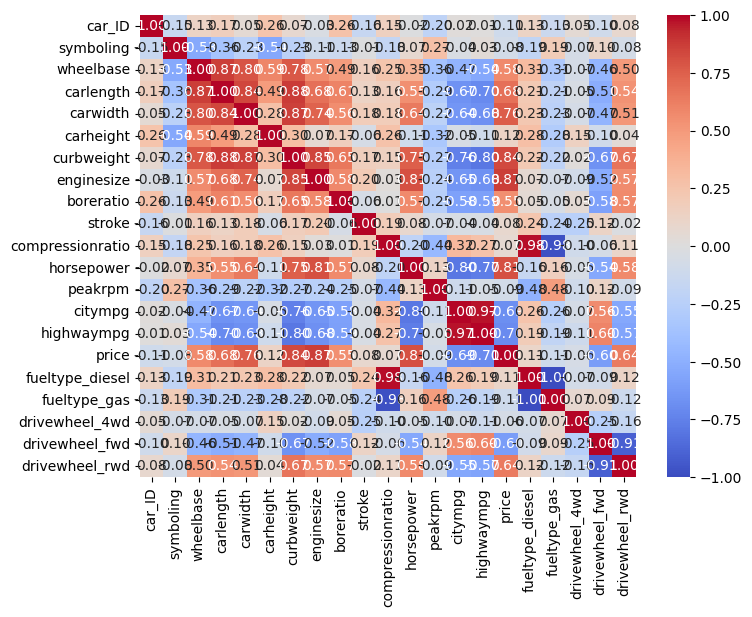

In [15]:

# Identificar y excluir columnas no numéricas
dfnumeros = df.select_dtypes(include=['number'])
correlation_matrix = dfnumeros.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Mostrar el mapa de calor
plt.show()

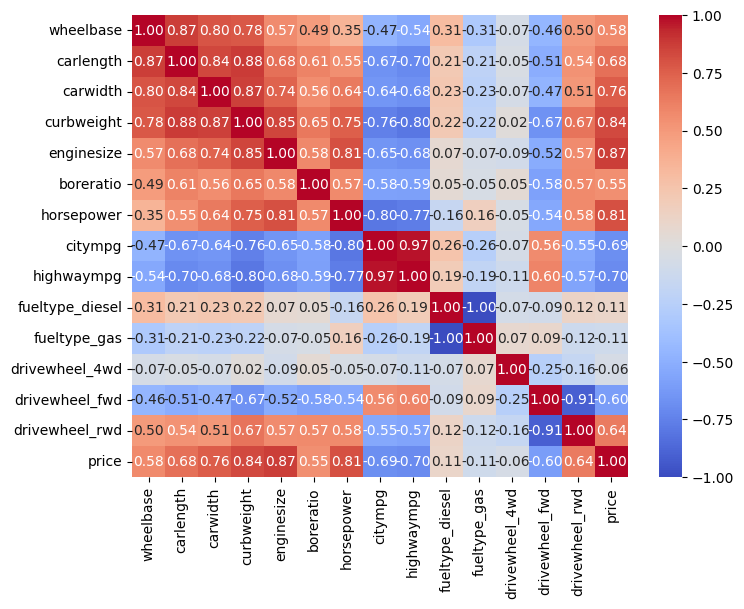

In [16]:
correlation_matrix = df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
                          'horsepower', 'citympg', 'highwaympg', 'fueltype_diesel', 'fueltype_gas', 'drivewheel_4wd',
                              	'drivewheel_fwd',	'drivewheel_rwd','price']].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Mostrar el mapa de calor
plt.show()

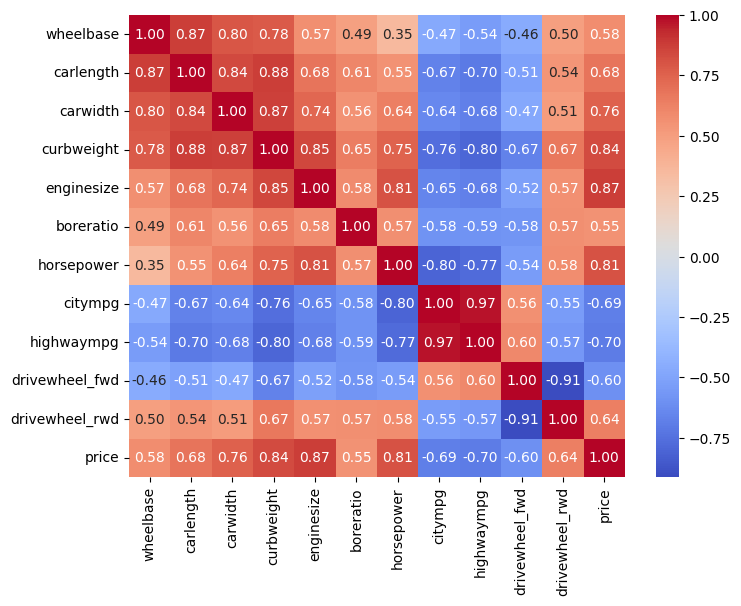

In [17]:
correlation_matrix = df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
                          'horsepower', 'citympg', 'highwaympg', 
                              	'drivewheel_fwd',	'drivewheel_rwd','price']].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Mostrar el mapa de calor
plt.show()

In [18]:
df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 
    'boreratio', 'horsepower', 'citympg', 'highwaympg', 
    'drivewheel_fwd',	'drivewheel_rwd','price']].describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,drivewheel_fwd,drivewheel_rwd,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,2555.565854,126.907317,3.329756,104.117073,25.219512,30.751220,0.585366,0.370732,13276.710571
std,6.021776,12.337289,2.145204,520.680204,41.642693,0.270844,39.544167,6.542142,6.886443,0.493865,0.484183,7988.852332
min,86.600000,141.100000,60.300000,1488.000000,61.000000,2.540000,48.000000,13.000000,16.000000,0.000000,0.000000,5118.000000
25%,94.500000,166.300000,64.100000,2145.000000,97.000000,3.150000,70.000000,19.000000,25.000000,0.000000,0.000000,7788.000000
50%,97.000000,173.200000,65.500000,2414.000000,120.000000,3.310000,95.000000,24.000000,30.000000,1.000000,0.000000,10295.000000
75%,102.400000,183.100000,66.900000,2935.000000,141.000000,3.580000,116.000000,30.000000,34.000000,1.000000,1.000000,16503.000000
max,120.900000,208.100000,72.300000,4066.000000,326.000000,3.940000,288.000000,49.000000,54.000000,1.000000,1.000000,45400.000000


Modelo de regresión con aprendizaje supervisado que permita predecir el precio final de los vehículos.

In [19]:
#Se eligen los parámetros que se utilizarán y la variable a predecir

X2=df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 
    'boreratio', 'horsepower', 'citympg', 'highwaympg', 
    'drivewheel_fwd',	'drivewheel_rwd']]
y2=df[['price']]

In [20]:
#Se dividen los datos en conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Se normalizan los parámetros
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [22]:
#Se crea el modelo de regresión lineal
modelo_regresion = LinearRegression()

In [23]:
#se entrena el modelo
# modelo_regresion.fit(X_train_scaled, y_train)
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [24]:
#Se realiza la predicción
y_pred = modelo_regresion.predict(X_test)
# y_pred = modelo_regresion.predict(X_test_scaled)

In [26]:
#Se evalua el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Se muestran los resultados
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
# el RMSE representa un error relativo de aproximadamente el 7.82% del rango total de precios (3555.3/(45400−5118)).

MSE: 12424894.52
R2: 0.84
RMSE: 3524.90


In [27]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,...,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.097561,0.902439,0.043902,0.585366,0.370732
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,...,39.544167,476.985643,6.542142,6.886443,7988.852332,0.297446,0.297446,0.205380,0.493865,0.484183
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5200.000000,24.000000,30.000000,10295.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,34.000000,16503.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
print('La pendiente obtenida con Sklearn es :', modelo_regresion.coef_)
print('La ordenada al origen obtenida con Sklearn es:', modelo_regresion.intercept_)

La pendiente obtenida con Sklearn es : [[ 8.08338440e+00  4.86408434e+00  8.43077676e+02 -3.95732245e-01
   9.05052940e+01 -1.97112269e+03  3.99441892e+01 -1.87811864e+02
   1.29351338e+02 -1.75079052e+03  8.92100083e+02]]
La ordenada al origen obtenida con Sklearn es: [-50639.54190608]


In [29]:
df.iloc[144]

car_ID                    145
symboling                   0
CarName             subaru r1
aspiration                std
doornumber               four
carbody                 sedan
enginelocation          front
wheelbase                97.0
carlength               172.0
carwidth                 65.4
carheight                54.3
curbweight               2385
enginetype               ohcf
cylindernumber           four
enginesize                108
fuelsystem               2bbl
boreratio                3.62
stroke                   2.64
compressionratio          9.0
horsepower                 82
peakrpm                  4800
citympg                    24
highwaympg                 25
price                  9233.0
fueltype_diesel           0.0
fueltype_gas              1.0
drivewheel_4wd            1.0
drivewheel_fwd            0.0
drivewheel_rwd            0.0
Name: 144, dtype: object

In [30]:
modelo_regresion.coef_

array([[ 8.08338440e+00,  4.86408434e+00,  8.43077676e+02,
        -3.95732245e-01,  9.05052940e+01, -1.97112269e+03,
         3.99441892e+01, -1.87811864e+02,  1.29351338e+02,
        -1.75079052e+03,  8.92100083e+02]])

In [31]:
fueltype=0
enginesize=108
horsepower=82
peakrpm=4800

preciofinal=modelo_regresion.coef_[0][0]*fueltype + modelo_regresion.coef_[0][1]*enginesize + modelo_regresion.coef_[0][2]*horsepower +  modelo_regresion.coef_[0][3]*peakrpm + modelo_regresion.intercept_
print(preciofinal)

[17118.63387719]


In [32]:
preciofinal=3940*fueltype + 123*enginesize + 58.8*horsepower +  1.79*peakrpm -18076
print(preciofinal)

8621.599999999999
